# The Perceptron Learning Algorithm 

In the context of the breast cancer dataset, the labels 0 and 1 represent the two classes into which the tumors have been classified. Specifically:

- Maligent = 0 - tumors that are problematic.
- Benign = 1 - tumors that are not usually problematic.

In this dataset, the goal is to build a model that can predict whether a given tumor is benign or malignant based on its characteristics (represented by the various features in the dataset). This is a binary classification problem, where the two classes are represented by the labels 0 and 1.

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [97]:
# Load the breast cancer dataset from sklearn
data = load_breast_cancer()
# Split into features and labels
X = data.data
y = data.target
print(data.DESCR) 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [98]:
#create dataframe to explore
df = pd.DataFrame(data.data, columns=data.feature_names)
# Add a target column as well
df['target'] = data.target
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


# Data Visualization

['malignant' 'benign']


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


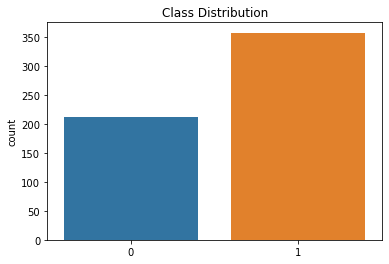

In [99]:
label_names = data['target_names']
print(label_names)
sns.countplot(y)
plt.title("Class Distribution")
plt.show()

- Class distribution: 357 benign (Label 1), 212 malignant (Label 0) cases

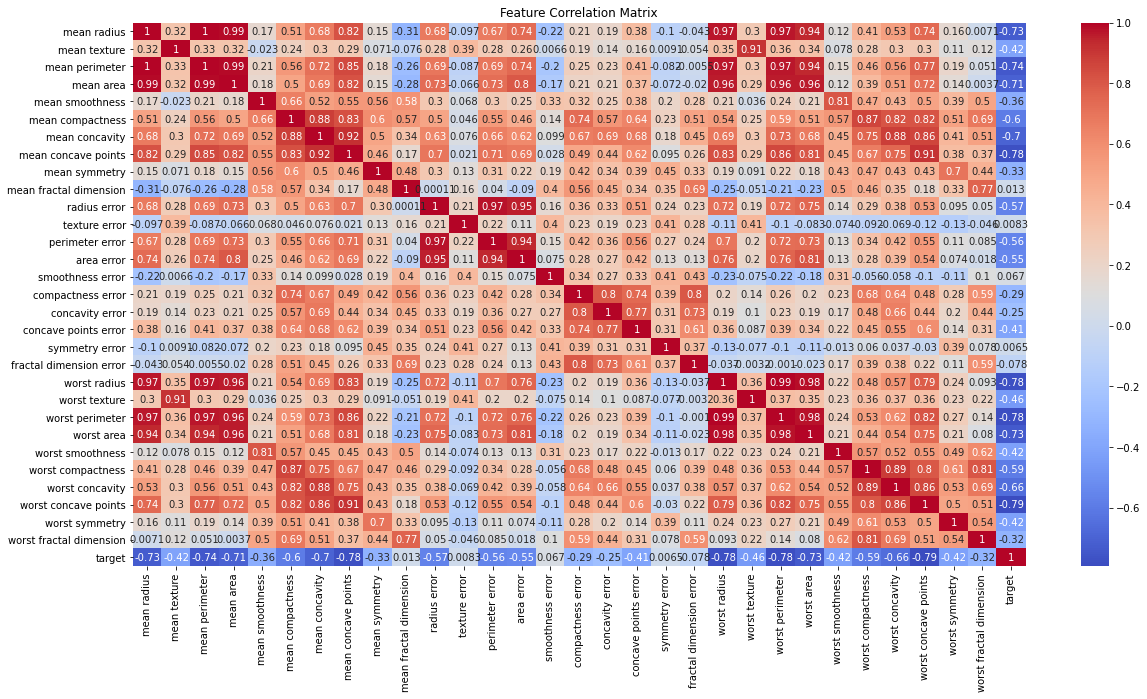

In [100]:

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


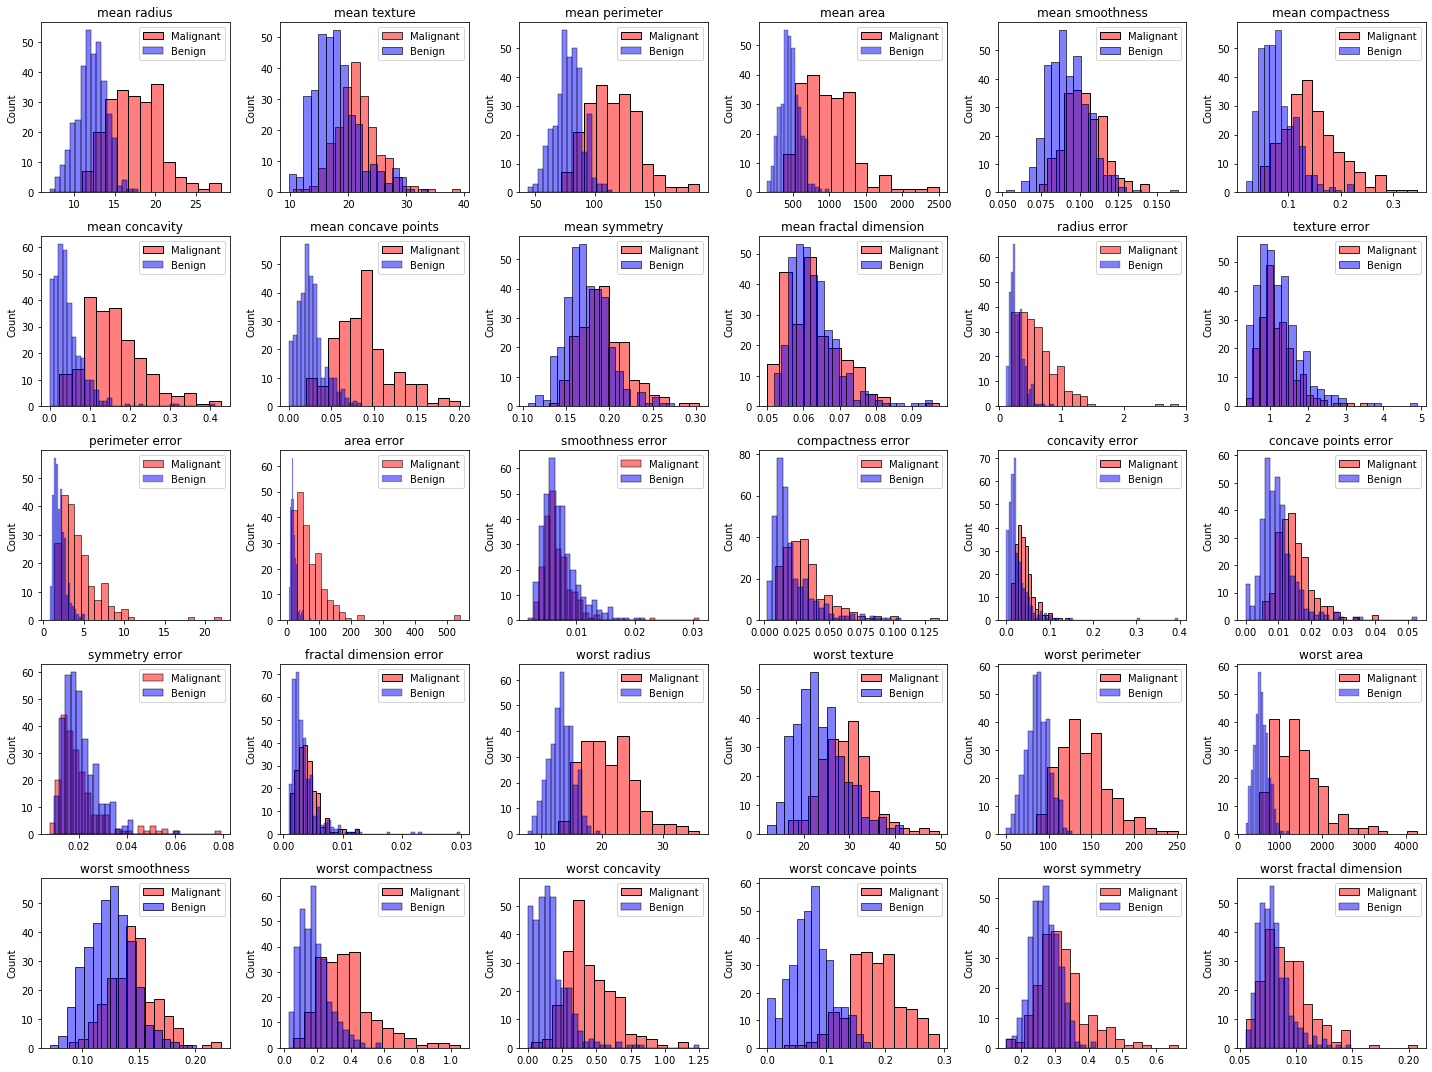

In [101]:
fig, axs = plt.subplots(5, 6, figsize=(20, 15))
axs = axs.flatten()

for i in range(X.shape[1]):
    sns.histplot(data=X[y==0, i], ax=axs[i], color="red", alpha=0.5)
    sns.histplot(data=X[y==1, i], ax=axs[i], color="blue", alpha=0.5)
    axs[i].set_title(data.feature_names[i])
    axs[i].legend(["Malignant", "Benign"])

fig.tight_layout()
plt.show()

# Model Building

In [102]:
#Split data into test and train
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Define the Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def train(self, X, y):
        # Initialize weights and bias to zeros
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        # Update weights and bias
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                #self.weights[:-1] -= update*xi
                #self.bias[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def predict(self, X):
        # Compute the linear combination of inputs and weights
        #z = np.dot(X, self.weights) + self.bias
        z = np.dot(X, self.w_[:-1]) + self.w_[-1]
        
        # Apply the step function to the linear combination
        if z > 0:
            return 1
        else:
            return 0

In [104]:
# Train the Perceptron on the training data
perceptron = Perceptron(learning_rate=0.01, epochs=1000)
perceptron.train(X_train, y_train)

In [105]:
# Make predictions on the testing data and compute the accuracy
y_pred = [perceptron.predict(X_test[i]) for i in range(X_test.shape[0])]
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.956140350877193


In [106]:
print(y_test == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True False  True]
